# Paminus Murungi King'ori
# CIT-223-032/2018

# A neural network for classifying handwritten characters

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# About the dataset
The dataset has 3410 images with handwritten characters (0-9 numbers, a-z alphabets lowercase and uppercase)
The goal is to train the model to recognize and predict the characters efficiently and categorize between 62 unique characters using a neural network


**import the libraries**

In [2]:
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plt

# Split the dataset
Split the data into 3 datasets - training set, validation test and test set

In [75]:
data_path = r""

dataset = pd.read_csv('english.csv')
rand = random.sample(range(len(dataset)), 500)
validation_set = pd.DataFrame(dataset.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
dataset.drop(rand, inplace=True)

rand = random.sample(range(len(validation_set)), 30)
test_set = pd.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
validation_set.drop(rand, inplace=True)


# Load data
Load the images through **flow_from_dataframe** method

In [76]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=dataset, directory=data_path, x_col='image', y_col='label', 
                                                               target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=data_path, x_col='image', y_col='label', 
                                                           target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=data_path, x_col='image', y_col='label', 
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 470 validated image filenames belonging to 62 classes.
Found 30 validated image filenames belonging to 27 classes.


# Building the neural network
**TensorFlow** will be used to build the convolutional neural network.


In [77]:
cnn = tf.keras.models.Sequential()

# add convolutional and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

# Building, compiling and training the neural network

From the above step we have received the flattened matrix of the images that we processed
We are going to feed it to our neural network and train it

The model accuracy improves as the epochs iteration progresses

In [78]:
# add full connection, output layer
cnn.add(tf.keras.layers.Dense(units=600, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=62, activation='softmax'))

# compile cnn
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(x=training_data_frame, validation_data=validation_data_frame, epochs=5)

Epoch 1/5
91/91 [==============================] - 39s 425ms/step - loss: 3.7058 - accuracy: 0.1096 - val_loss: 2.6062 - val_accuracy: 0.3149
Epoch 2/5
91/91 [==============================] - 39s 423ms/step - loss: 1.9407 - accuracy: 0.4759 - val_loss: 1.4310 - val_accuracy: 0.6191
Epoch 3/5
91/91 [==============================] - 41s 447ms/step - loss: 1.1918 - accuracy: 0.6591 - val_loss: 1.1738 - val_accuracy: 0.6766
Epoch 4/5
91/91 [==============================] - 39s 429ms/step - loss: 0.8562 - accuracy: 0.7464 - val_loss: 1.0662 - val_accuracy: 0.7000
Epoch 5/5
91/91 [==============================] - 40s 440ms/step - loss: 0.6193 - accuracy: 0.8096 - val_loss: 1.0377 - val_accuracy: 0.7383


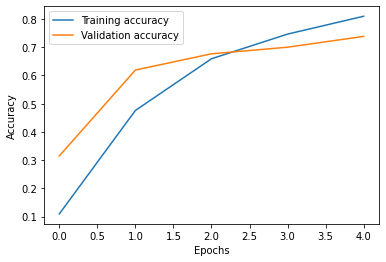

In [79]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"],label="Training accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.legend()
plt.show()

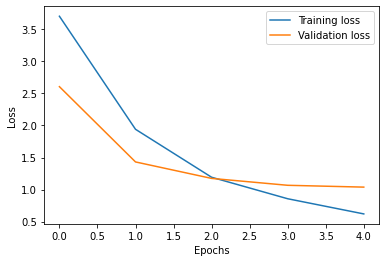

In [80]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.legend()
plt.show()

# Predicting the testset images

Since the model is trained, lets pass the testset images and see how well our model predicts
class_indices function gives us the neural network mapping for our 62 characters

The result image's name is the predicted character by our model

In [81]:
# print("Prediction mapping: ", training_data_frame.class_indices)
pred = cnn.predict(test_data_frame)

# switcher shows our network mapping to the prediction
switcher = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}


1/1 [==============================] - 0s 353ms/step


In [82]:
for i in range(len(test_set)):
    print(f"character {switcher[pred.argmax(axis=1)[i]]} Predicted with confidence of {round(pred.max(axis=1)[i]*100)}%")

character E Predicted with confidence of 100%
character J Predicted with confidence of 44%
character m Predicted with confidence of 90%
character J Predicted with confidence of 97%
character r Predicted with confidence of 49%
character C Predicted with confidence of 97%
character D Predicted with confidence of 59%
character B Predicted with confidence of 100%
character 8 Predicted with confidence of 95%
character H Predicted with confidence of 54%
character x Predicted with confidence of 100%
character R Predicted with confidence of 94%
character P Predicted with confidence of 100%
character L Predicted with confidence of 97%
character R Predicted with confidence of 100%
character S Predicted with confidence of 60%
character K Predicted with confidence of 98%
character H Predicted with confidence of 99%
character u Predicted with confidence of 50%
character T Predicted with confidence of 100%
character J Predicted with confidence of 55%
character a Predicted with confidence of 77%
char